## Investigate Images

Andrej Karpathy suggests we "[Become one with the data](http://karpathy.github.io/2019/04/25/recipe/)" by looking at it. Since we only have 8,000 images we'll just look at all of them.

### Notes on Images

Notes:
- Lots of streaks of lens glare
- Lots of black streaks (always background, similar patterns)
- Masks are usually rectangles
- All appear to be over the ocean
- Some appear to have skew to them, but the labels will always be unskewed

**Interesting training images:**
 - 5e70931.jpg Has smaller black streaks in it
 - 7ca1d0b.jpg Has a small black streak in it
 - 1e40a05.jpg is comprised of 3 images
 - 8bd81ce.jpg is comprised of 2 images and one is washed out
 - 41f92e5.jpg is comprised of 2 images and one is washed out
 - 449b792.jpg is comprised of 3 images and one is washed out (may have bad labels)
 - 563fc48.jpg is comprised of 3 images with a bad label
 - 1588d4c.jpg is comprised of 3 images 
 - 046586a.jpg is comprised of multiple images
 - b092cc1.jpg is partially corrupted
 - c26c635.jpg is partially corrupted
 - c0306e5.jpg is partially corrupted with a bad label
 - e04fea3.jpg is partially corrupted with a bad label
 - e5f2f24.jpg is partially corrupted 
 - ee0ba55.jpg seems weirdly labelled
 - fa645da is partially corrupted with a bad label
 - f1f99ee.jpg may be the top of 0f1786f.jpg?
 

**Interesting test images:**
- 3cb4ce5.jpg is corrupt
- 18c7c27.jpg is multiple images
- 25c5403.jpg is multiple images
- 43d43a8.jpg is multiple images
- 4375f93.jpg is multiple images
- **5383dcf.jpg is VERY similar to training ee0ba55.jpg???**
  - Perhaps the validation set is the same image but at a slightly different time?
  - They may re-use labels?
- 638185f.jpg is multiple images
- a4da892.jpg has a weird line
- d1378d2.jpg has a small distortion at the botom

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from pathlib import Path
from fastai.vision import get_image_files, open_image

from src.utils import rle_decode

In [4]:
DATA = Path('data')
TRAIN = DATA/"train.csv"
TEST = DATA/"sample_submission.csv"
TRAIN_FOLDER = DATA/"train_images_350x525"
TEST_FOLDER = DATA/"test_images_350x525"

train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)
train['label'] = train['Image_Label'].apply(lambda x: x.split('_')[1])
train['im_id'] = train['Image_Label'].apply(lambda x: x.split('_')[0])
test['label'] = test['Image_Label'].apply(lambda x: x.split('_')[1])
test['im_id'] = test['Image_Label'].apply(lambda x: x.split('_')[0])

train_images = get_image_files(TRAIN_FOLDER)
test_images = get_image_files(TEST_FOLDER)

**Bad Images**

Here are some sample bad/weird images:

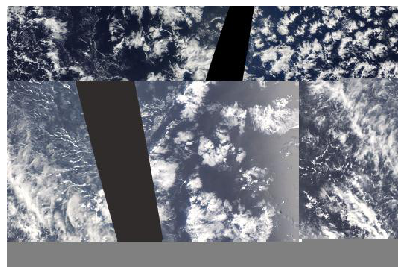

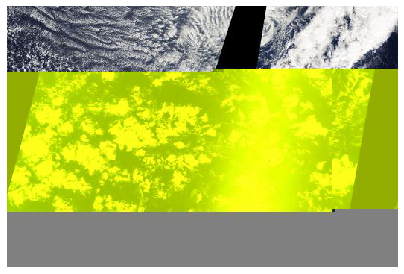

In [10]:
path = TRAIN_FOLDER/'449b792.jpg'
img = open_image(path)
img.show(figsize=(7,7))

path = TEST_FOLDER/'3cb4ce5.jpg'
img = open_image(path)
img.show(figsize=(7,7))

**Same Images**

These two images are particularly interesting because they are almost identical. The first is from the training set, the second is from the test set.

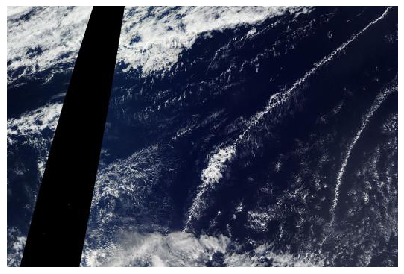

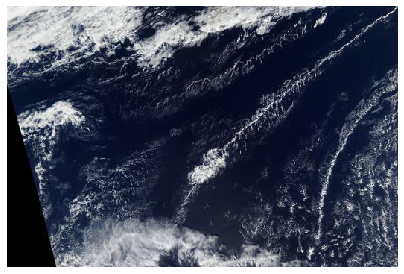

In [5]:
img_train = TRAIN_FOLDER/'ee0ba55.jpg'
img = open_image(img_train)
img.show(figsize=(7,7))

img_test = TEST_FOLDER/'5383dcf.jpg'
img = open_image(img_test)
img.show(figsize=(7,7))

Here are the labels for the training image:

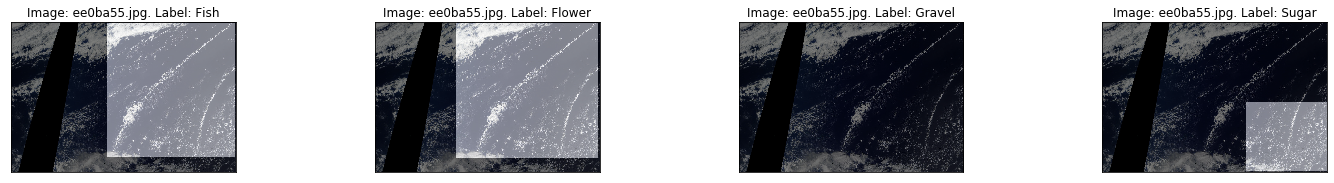

In [11]:
def plotImage(im_id):

    fig = plt.figure(figsize=(25, 16))
    for i, (idx, row) in enumerate(train.loc[train['im_id'] == im_id].iterrows()):
        ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
        im = Image.open(f"data/train_images/{row['Image_Label'].split('_')[0]}")
        plt.imshow(im)
        mask_rle = row['EncodedPixels']
        if isinstance(mask_rle, str):
            mask = rle_decode(mask_rle)
        else:
            mask = np.zeros((1400, 2100))
        plt.imshow(mask, alpha=0.5, cmap='gray')
        ax.set_title(f"Image: {row['Image_Label'].split('_')[0]}. Label: {row['label']}")
                     
plotImage('ee0ba55.jpg')

### Questions:
 - Do they have identical labels?
 - Are there more images like these two?
 - Do pairs exist solely across the train/test split? Are there pairs within each set? 